In [0]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

This notebook gathers all of the left and right error for each spectral type. We can compare the left and right error for each spectral type as well as comparing the spectral types against eachother.  Here I have put them all on one graph with a shift to easily scan across and notice the differences. 

In [0]:
%matplotlib inline

Intrinsic colors and spectral types from Dr. Larson's original code. There are 61 Spectral type in total and we have the h-k and j-h in a separate array for each spectral type. 

In [0]:
intHK=np.array([-0.1,-0.09,-0.09,-0.09,-0.09,-0.08,-0.09,-0.06,-0.07,-0.05,-0.06,-0.05,-0.05,-0.03,0,0.0025,0.005,0.0083,
            0.0117,0.015,0.02,0.025,0.0267,0.0283,0.03,0.0325,0.035,0.0367,0.0383,0.04,0.0425,0.045,0.0467,0.0483,
            0.05,0.051,0.052,0.0535,0.055,0.0575,0.06,0.06375,0.0675,0.07125,0.075,0.0825,0.09,0.0975,0.105,0.11,0.12,
            0.13,0.14217,0.1533,0.165,0.2,0.21,0.25,0.275,0.32,0.37])

intJH=np.array([-0.065,-0.065,-0.075,-0.095,-0.095,-0.075,-0.025,-0.045,-0.035,-0.045,-0.025,-0.025,-0.005,0.005,0,0.01,
            0.02,0.033,0.0467,0.06,0.075,0.09,0.103,0.117,0.13,0.1475,0.165,0.187,0.208,0.23,0.258,0.285,0.292,0.298,
            0.305,0.3125,0.32,0.325,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.475,0.5,0.54,0.58,0.61,0.635,0.66,0.6717,
            0.683,0.695,0.68,0.665,0.62,0.6,0.62,0.6])

SpType=np.array(['O6V','O7V','O8V','O9V','B0V','B1V','B2V','B3V','B4V','B5V','B6V','B7V','B8V','B9V',
            'A0V','A1V','A2V','A3V','A4V','A5V','A6V','A7V','A8V','A9V',
            'F0V','F1V','F2V','F3V','F4V','F5V','F6V','F7V','F8V','F9V',
            'G0V','G1V','G2V','G3V','G4V','G5V','G6V','G7V','G8V','G9V',
            'K0V','K1V','K2V','K3V','K4V','K5V','K6V','K7V','K8V','K9V',
            'M0V','M1V','M2V','M3V','M4V','M5V','M6V'])

x=np.arange(intHK.size)



Simulating uncertainty in observed colors with knowledge of spectral type from Monte Carlo. 

In [0]:
def prob_bins(x,meanbin,stdbin):
    # Create the probability distribution:
    lowedge, highedge = np.arange(len(x))-0.5,np.arange(len(x))+0.5 # put items at bin centers
    prob_bins = ss.norm.cdf(highedge, loc=meanbin, 
                            scale = stdbin)-ss.norm.cdf(lowedge, loc=meanbin, scale = stdbin)
    prob_bins = prob_bins / prob_bins.sum() # normalize the probabilities so their sum is 1

    return prob_bins

Here we create 2D arrays for the right error and the left error. In our case these will be the values that are more than 1.6 and those that are less than 1.6. I have also created an array for the number of data points we will collect for each spectral types. We will change the line of sight 91 times going from 0.1 to 1.0in steps of 0.01. At this point we will also assign each spectral type a number for its position in the pervious array: SpType, this will be labled spytpes. 

In [0]:
RMSLESS=np.zeros((61,91))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE=np.zeros((61,91))


los=np.arange(0.1,1.01,0.01)  #steps of los to take
sptypes = np.arange(0,61,1)  #number of spectral types


In the next cell we make all of our calculations for each spectral type to find the left and right error. First we set the standard deviation bin width to 2 and the line of sight of R to 1.6. As we run through each spectral type we change the line of sight from 0.1 to 1.0 in steps of 0.01. For each line of sight (91 in total) we calculate the standard deviation R and then collect the absolute value of parts that are less than 1.6 and more than 1.6 and put them into the 2D arrays RMSLESS and RMSMORE respectivly. 

In [83]:
#now to make a function that will put the left and right side of each spectral type into my 2d array


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbins = 2
  
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

  
    RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))  #RMS_R <1.6
    RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))  #RMS_R >1.6

    RMSLESS[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide


Before compiling all the data onto one figure with shifts for each spectral type I want to see what they look like individually. To do this I simply plot the RMS<1.6 and the RMS>1.6 values against each corresponding line of sight value, where the less than 1.6 values are in red and the greater than 1.6 values are in blue. I have each of the spectral types graphed individually with their names in the title and above them is their meanbin value for array position labeling. 

In the cell below we can notice that for spectral type K5V (meanbin 49) and for spectral type K7V (meanbin 51) the graphs look drastically different. This is because there are one or two major outliers  (magnitude difference of 10^15) in each graph. I believe this is because at some point in calculating the different errors we run into a case where we are very close to dividing by zero. 

I also noticed that the last few spectral types have errors that are up in the 10s place meaning that when stacked with a separation of 2 these graphs will collide and look messy. 

('meanbin is', 0)


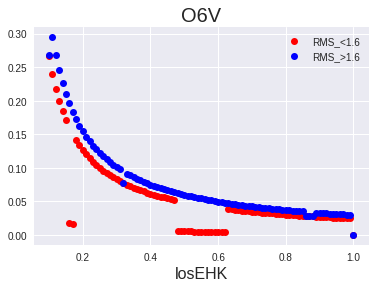

('meanbin is', 1)


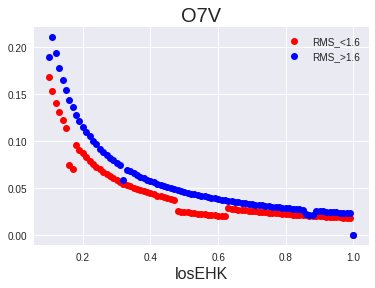

('meanbin is', 2)


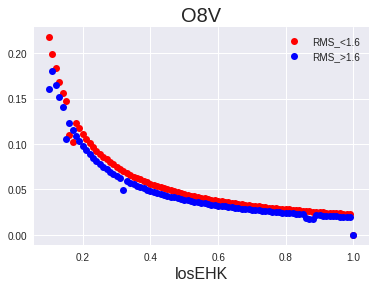

('meanbin is', 3)


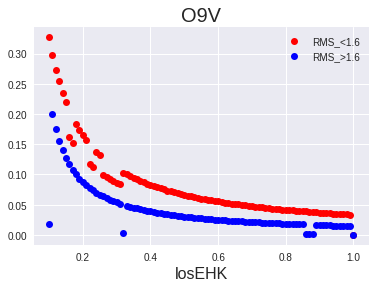

('meanbin is', 4)


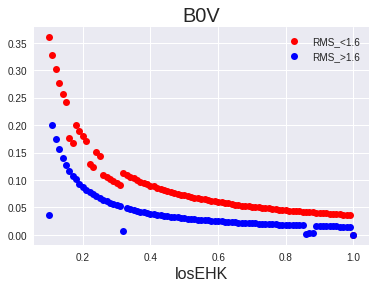

('meanbin is', 5)


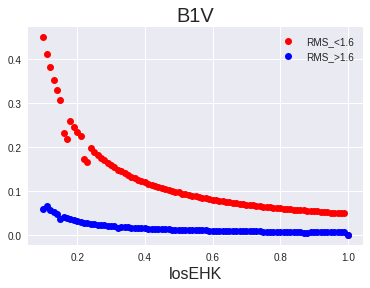

('meanbin is', 6)


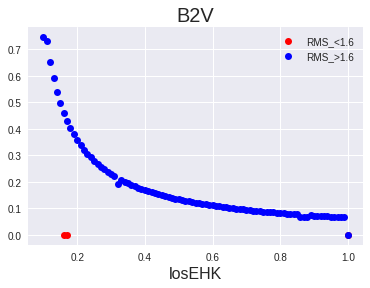

('meanbin is', 7)


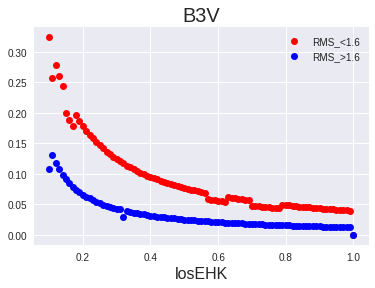

('meanbin is', 8)


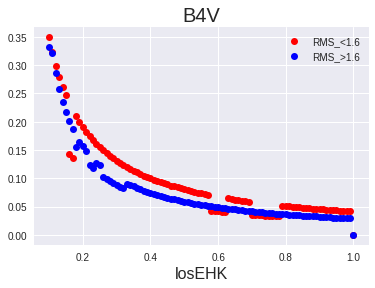

('meanbin is', 9)


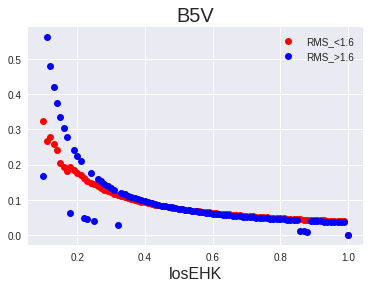

('meanbin is', 10)


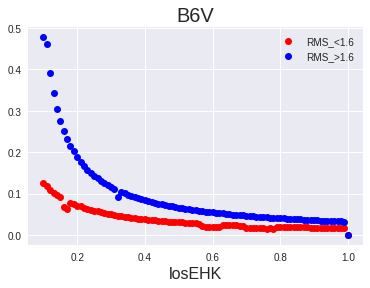

('meanbin is', 11)


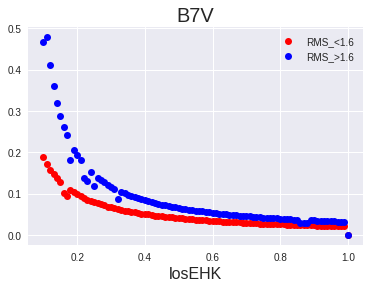

('meanbin is', 12)


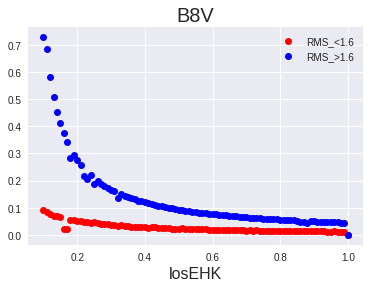

('meanbin is', 13)


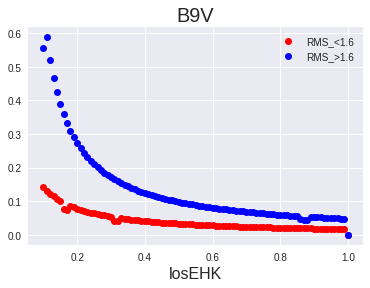

('meanbin is', 14)


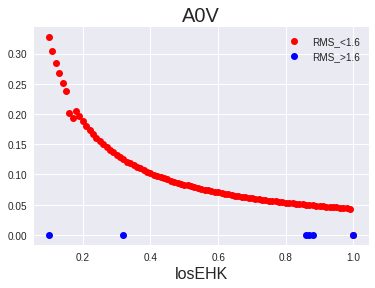

('meanbin is', 15)


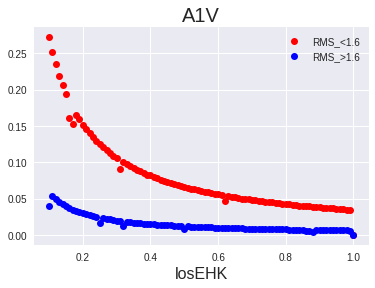

('meanbin is', 16)


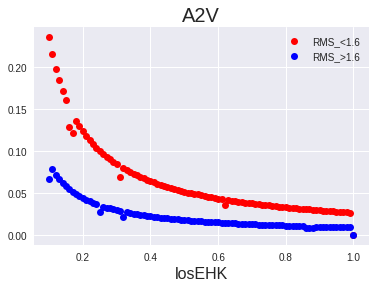

('meanbin is', 17)


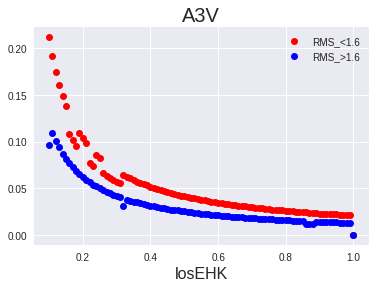

('meanbin is', 18)


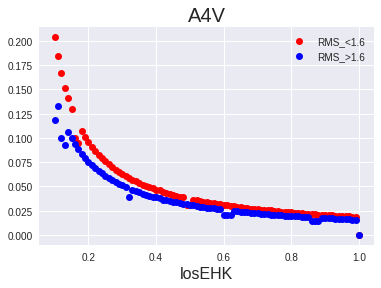

('meanbin is', 19)


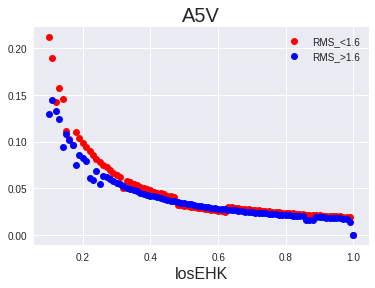

('meanbin is', 20)


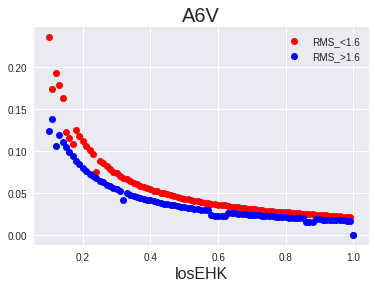

('meanbin is', 21)


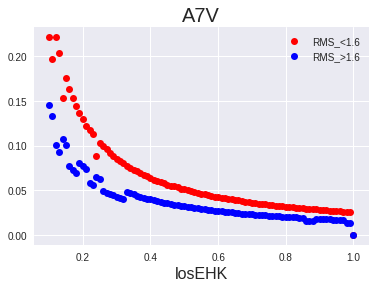

('meanbin is', 22)


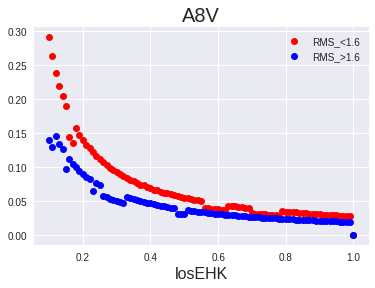

('meanbin is', 23)


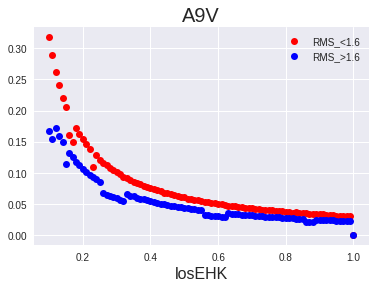

('meanbin is', 24)


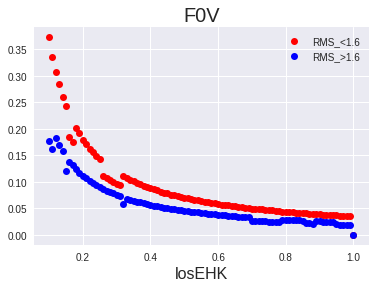

('meanbin is', 25)


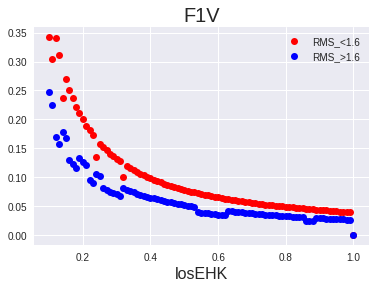

('meanbin is', 26)


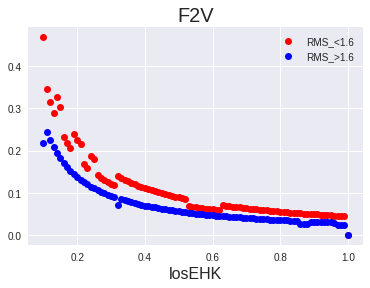

('meanbin is', 27)


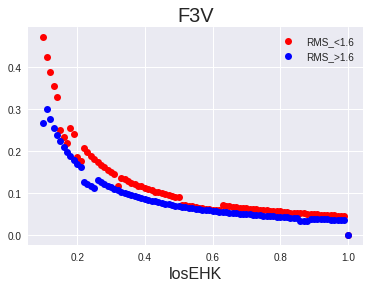

('meanbin is', 28)


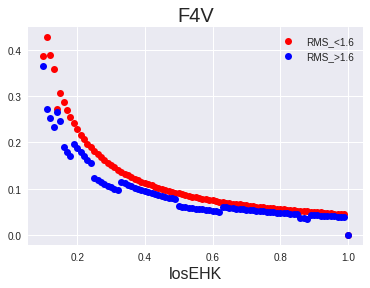

('meanbin is', 29)


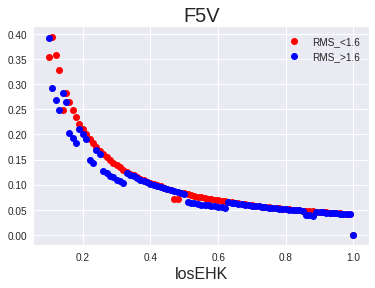

('meanbin is', 30)


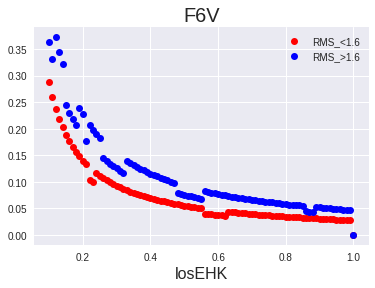

('meanbin is', 31)


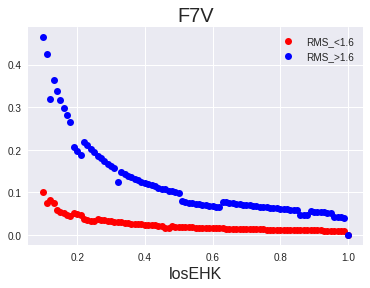

('meanbin is', 32)


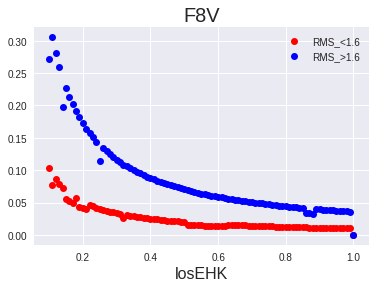

('meanbin is', 33)


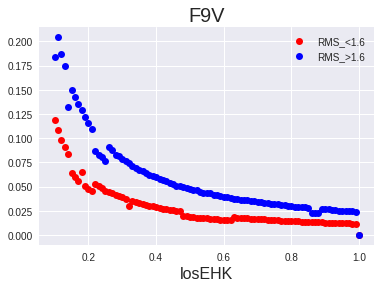

('meanbin is', 34)


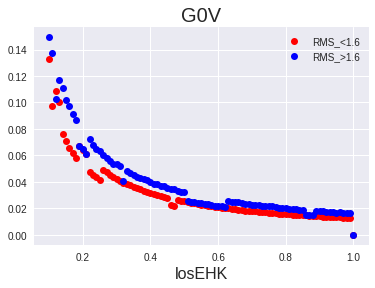

('meanbin is', 35)


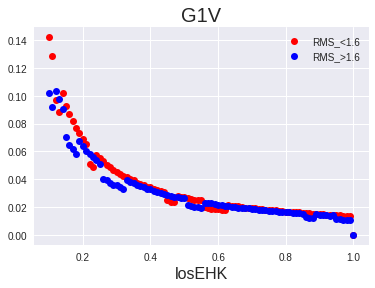

('meanbin is', 36)


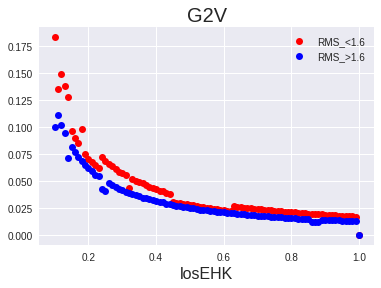

('meanbin is', 37)


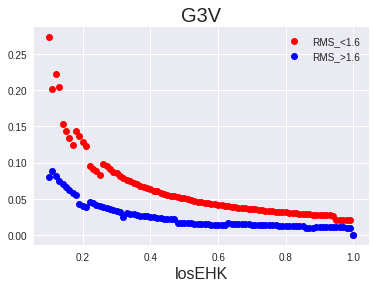

('meanbin is', 38)


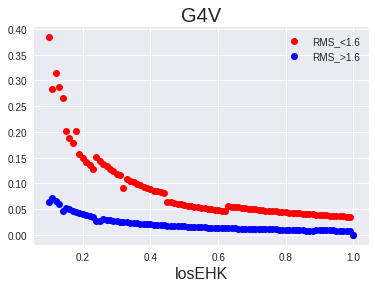

('meanbin is', 39)


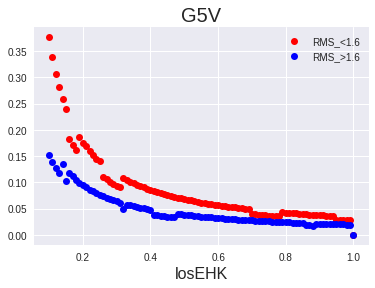

('meanbin is', 40)


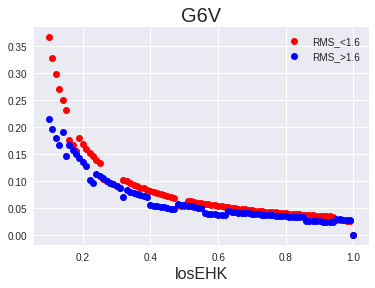

('meanbin is', 41)


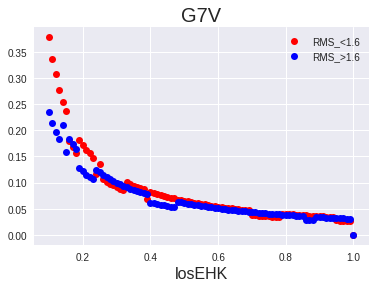

('meanbin is', 42)


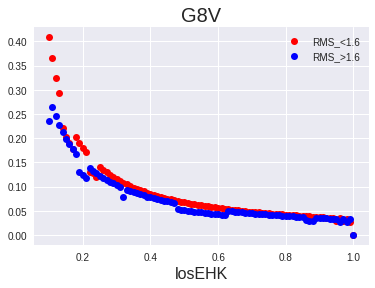

('meanbin is', 43)


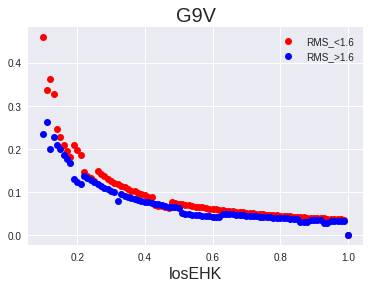

('meanbin is', 44)


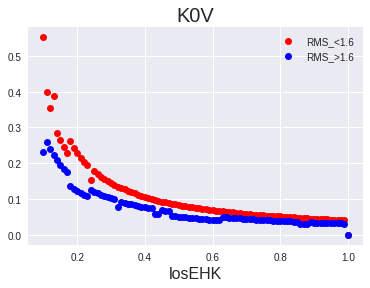

('meanbin is', 45)


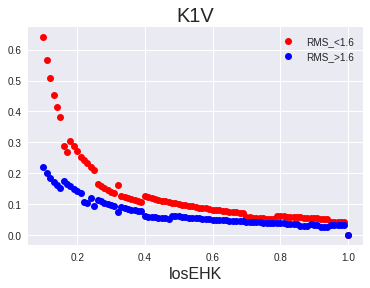

('meanbin is', 46)


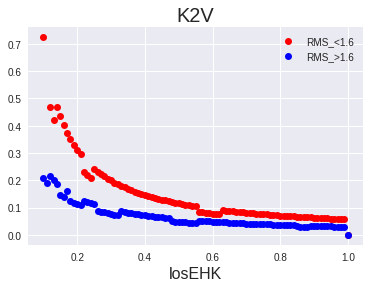

('meanbin is', 47)


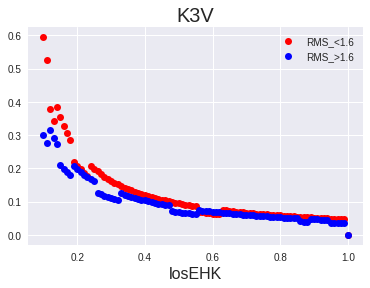

('meanbin is', 48)


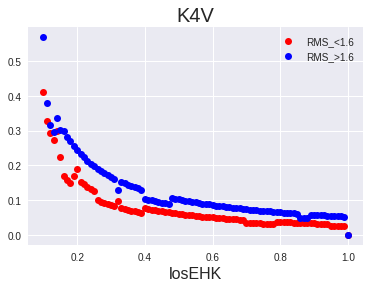

('meanbin is', 49)


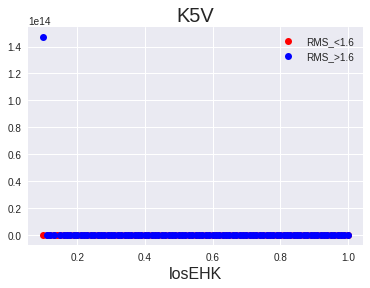

('meanbin is', 50)


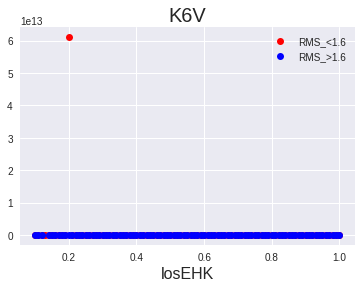

('meanbin is', 51)


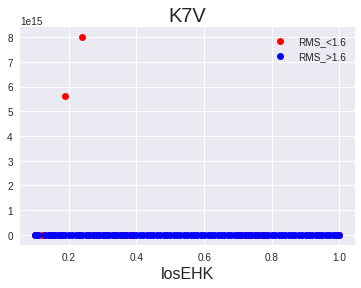

('meanbin is', 52)


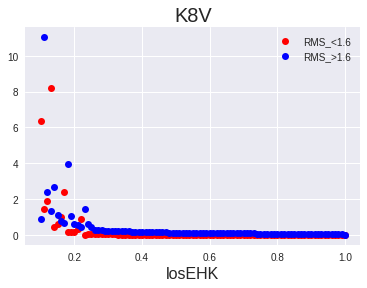

('meanbin is', 53)


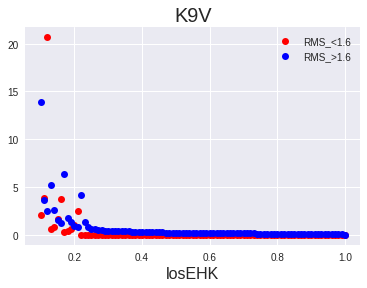

('meanbin is', 54)


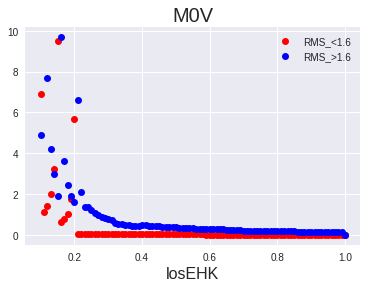

('meanbin is', 55)


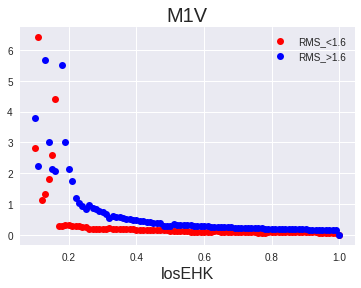

('meanbin is', 56)


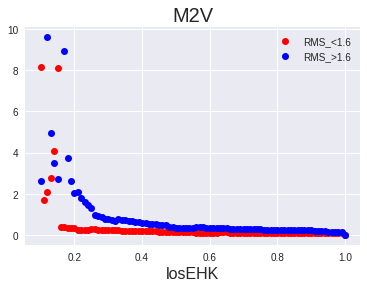

('meanbin is', 57)


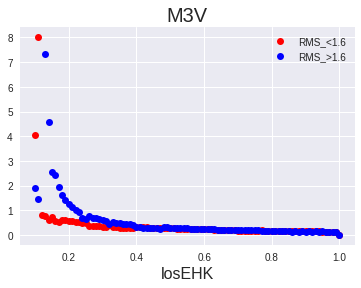

('meanbin is', 58)


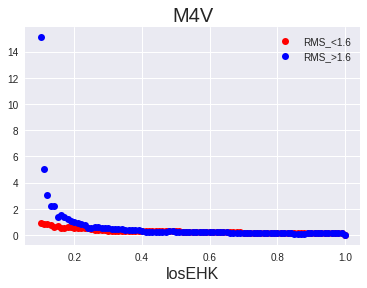

('meanbin is', 59)


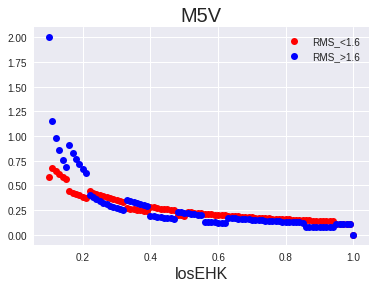

In [84]:
for k in range(0,60):                                      #plotting each spectral type seperately 
  name=SpType[k]
  plt.plot(los,RMSLESS[k],'ro', label='RMS_<1.6')
  plt.plot(los, RMSMORE[k],'bo',label='RMS_>1.6')          #plot of delta sigma and sigma on the same axies
  plt.title(name, fontsize=20)
  plt.xlabel('losEHK',fontsize=16)
  plt.legend(loc='best')
  print('meanbin is',k)
  plt.show()

In the previous cell I noticed that there are a few spectral types with major outliers that would cause my graph of all the types stacked to show just the outliers with a cluster at the bottom near zero. I don't want to keep out entire spectral types because of one bad data point. What I would like to do is simply not plot the outliers but I cannot seem to make that happen. I have tried a while loop but it seems to spit out errors of difference of inputs. This will be an issue that I have to address in the near future. In the mean time I will simply set these values to zero just to drop them to the bottom and keep the spectral types. 

looking at the right and left values of the graphs with outstanding outliers we can find exactly which values are causing the issues. Below I have printed out all the values for the three spectral types with outliers and noted the positions of the outliers.

In [87]:
print('K5V <1. values',RMSLESS[49], 'K5V >1.6 values', RMSMORE[49])
print('K6V <1. values',RMSLESS[50], 'K6V >1.6 values', RMSMORE[50])
print('K7V <1. values',RMSLESS[51], 'K7V >1.6 values', RMSMORE[51])


('K5V <1. values', array([0.17213681, 0.18276413, 0.21257538, 0.33348282, 0.08445898,
       0.13347642, 0.23687765, 0.07567196, 0.06349164, 0.07313647,
       0.06908839, 0.06551744, 0.06238916, 0.05940987, 0.05656249,
       0.04409088, 0.04223354, 0.04064655, 0.03895325, 0.03747333,
       0.03620837, 0.03518175, 0.04154517, 0.04007283, 0.03889663,
       0.03775086, 0.03663339, 0.03558912, 0.03471617, 0.03367702,
       0.02669905, 0.02602536, 0.02544224, 0.02473262, 0.02411217,
       0.02362489, 0.02307241, 0.02253657, 0.02714153, 0.02653337,
       0.02603162, 0.02546977, 0.0249384 , 0.02449886, 0.02392461,
       0.02347546, 0.02305301, 0.02263551, 0.02228793, 0.02185527,
       0.0215403 , 0.02112073, 0.02073616, 0.02046233, 0.02007176,
       0.01982009, 0.01946366, 0.01914887, 0.01892851, 0.01861764,
       0.01832075, 0.01803215, 0.01780708, 0.01753331, 0.0172956 ,
       0.01705225, 0.0168281 , 0.01666016, 0.01641345, 0.0161786 ,
       0.0159713 , 0.01572993, 0.01557842, 

From looking at the values in the previous cell i was able to pick out 4 different major outlier points.



K5V(49):  outlier in >1.6 at position 0 or los=0.1 

K6V(50): outlier in <1.6 at position 10 or los=0.2

K7V(51): outlier in <1.6 at position 9 or at los=0.19
   outlier in <1.6 at position 14 or at los 0.24





Until I find a way to simply not plot the outlier values we will just move them down to slightly below the clutter to at least let us see all the spectral types

Below I will plot both the right and left for each spectral type with a 2 unit spacing between each type. where Blue is the <1.6 values and Red is >1.6 values. The height of the spectral type depends on where it is at in the list of spectral types

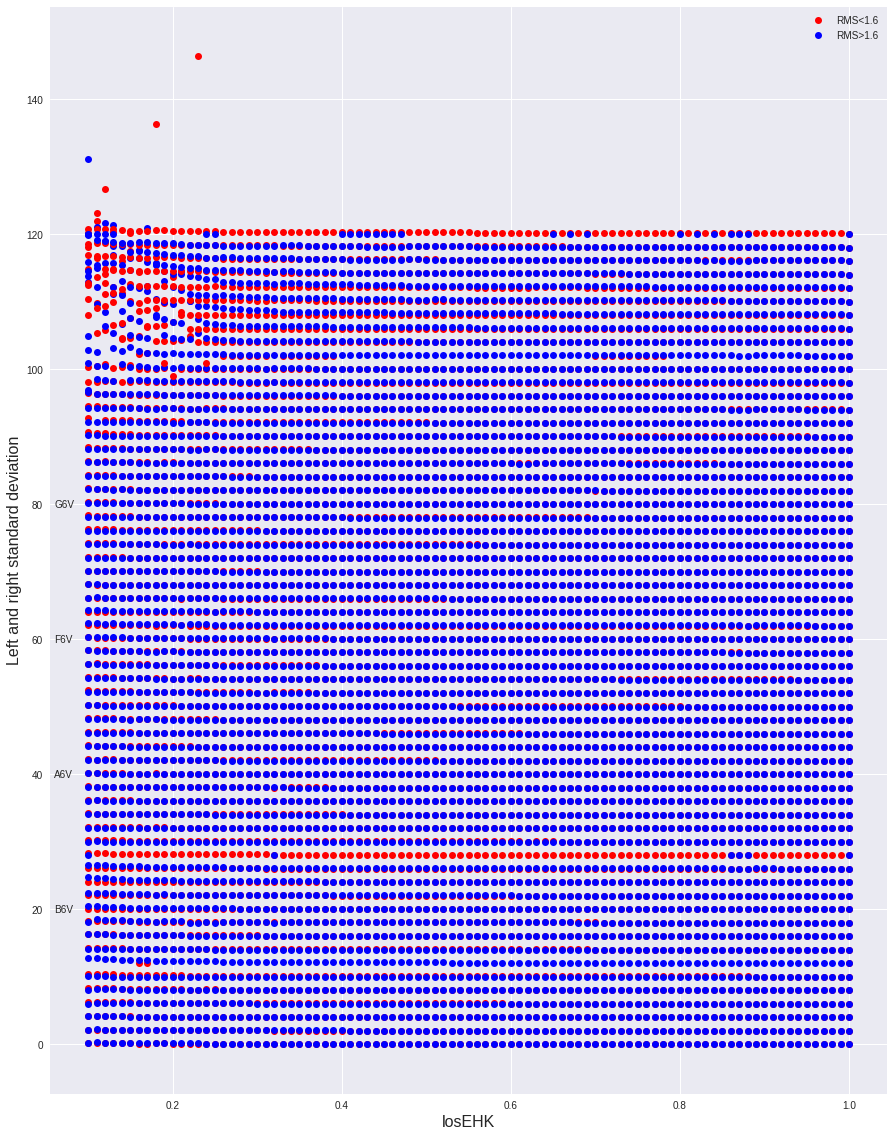

In [125]:
#shifting the outliers down to make whole graph visible
RMSMORE[49][0]=-1                       

RMSLESS[50][10]=-1

RMSLESS[51][9]=-1
RMSLESS[51][14]=-1

#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(2*k),'ro')        
  plt.plot(los,RMSMORE[k]+(2*k),'bo')

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS[0],'ro', label='RMS<1.6')
plt.plot(los,RMSMORE[0],'bo', Label='RMS>1.6')

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')                    #labeling a few of the spectral types
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

This mashing of points feel chaotic and hard to see any trends lets try looking at it with connected lines.

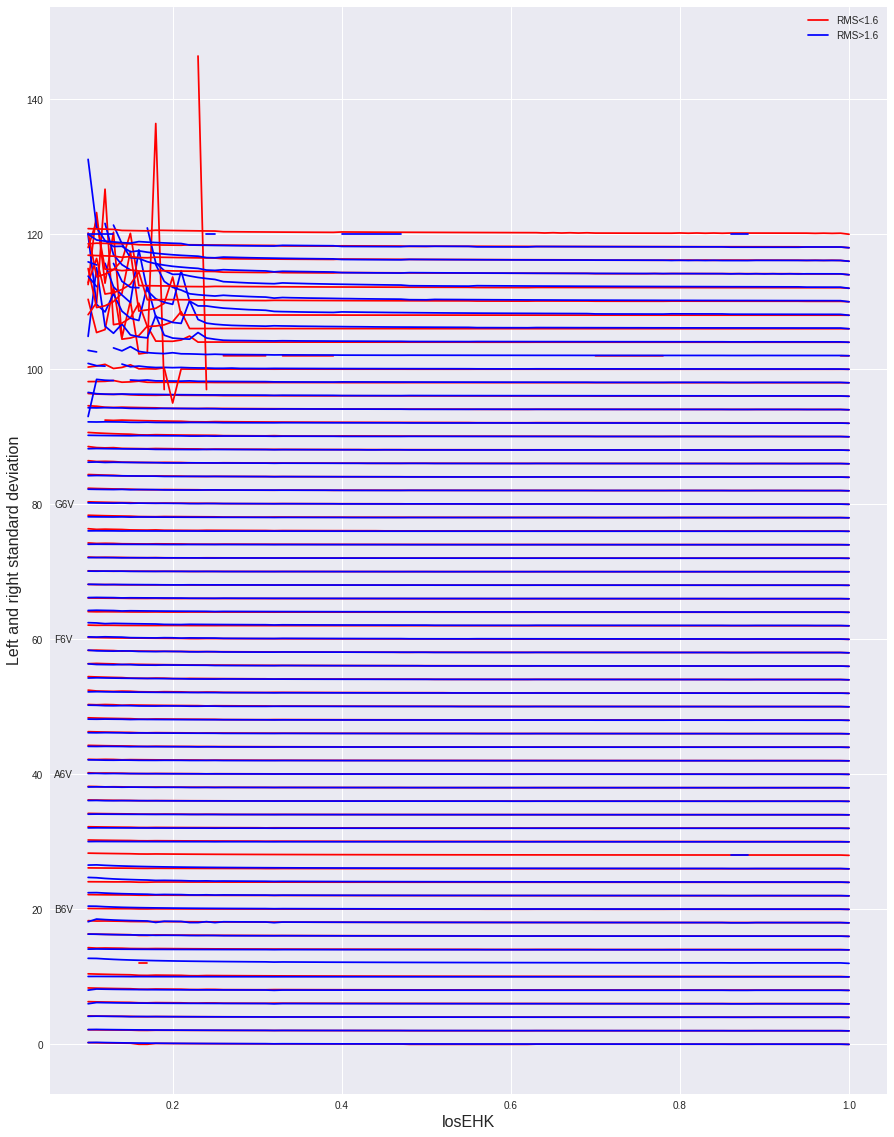

In [122]:
#shifting the outliers down to make whole graph visible
RMSMORE[49][0]= -5                       

RMSLESS[50][10]=-5

RMSLESS[51][9]=-5
RMSLESS[51][14]=-5

#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(2*k),'r')        
  plt.plot(los,RMSMORE[k]+(2*k),'b')

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS[0],'r', label='RMS<1.6')
plt.plot(los,RMSMORE[0],'b', Label='RMS>1.6')

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()